# Churn_Modelling
#### Reference: https://www.kaggle.com/aakash50897/churn-modellingcsv

In [1]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values
dataset[0:10]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


## Data Preprocessing

In [8]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:] # Avoiding dummy variable trap!

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\Hong\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Hong\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


## Visualising the PCA results

### 2D Plot

In [3]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def pca_plot(X, y, title = 'PCA'):
    X_set, y_set = X, y
    plt.figure()
    for i, j in enumerate(np.unique(y_set)): 
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    color = ListedColormap(('red', 'green'))(i), 
                    edgecolor = 'black', 
                    label = j)
    plt.title(title)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend()
    plt.show()

### 3D Plot

In [4]:
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D

def pca_plot3D(X, y, title = 'PCA'):
    X_set, y_set = X, y
    fig = plt.figure()
    ax = Axes3D(fig)
    for i, j in enumerate(np.unique(y_set)): 
        ax.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], X_set[y_set == j, 2], 
                   color = ListedColormap(('red', 'green'))(i), 
                   edgecolor = 'black', 
                   label = j)
    plt.title(title)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    plt.legend()
    plt.show()

## Applying PCA

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

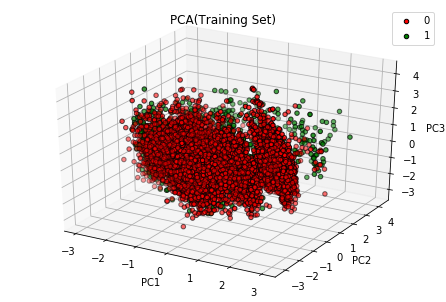

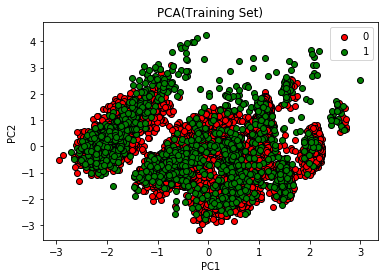

In [6]:
pca_plot3D(X = X_train, y = y_train, title = 'PCA(Training Set)')
pca_plot(X = X_train, y = y_train, title = 'PCA(Training Set)')

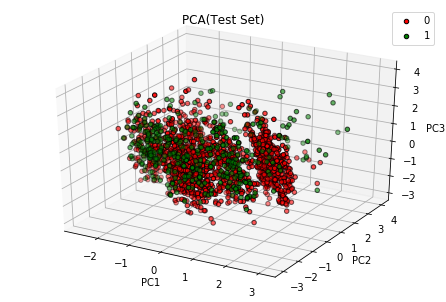

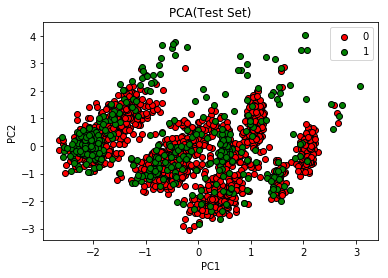

In [7]:
pca_plot3D(X = X_test, y = y_test, title = 'PCA(Test Set)')
pca_plot(X = X_test, y = y_test, title = 'PCA(Test Set)')

## Applying Kernel PCA

In [9]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 3, kernel = "rbf")
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

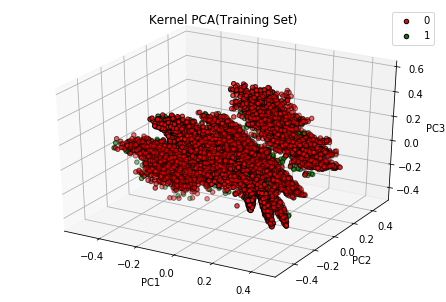

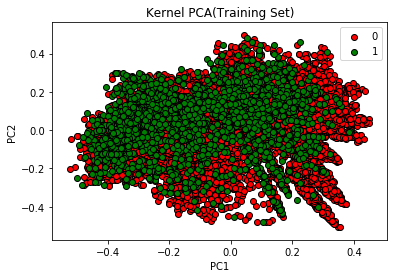

In [10]:
pca_plot3D(X = X_train, y = y_train, title = 'Kernel PCA(Training Set)')
pca_plot(X = X_train, y = y_train, title = 'Kernel PCA(Training Set)')

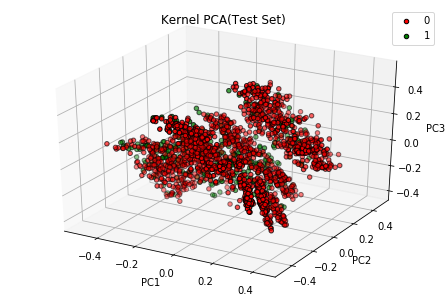

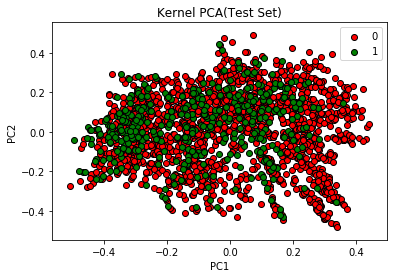

In [11]:
pca_plot3D(X = X_test, y = y_test, title = 'Kernel PCA(Test Set)')
pca_plot(X = X_test, y = y_test, title = 'Kernel PCA(Test Set)')